# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


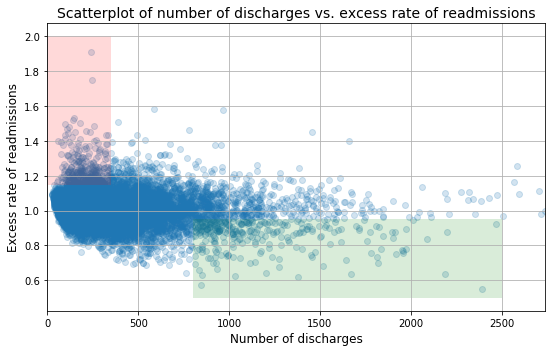

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

The measurements above 2500 were not highlighted
just more points in red area (more hospitals of a smaller size => more outliers)
green variation largely random looking but also cherry picking only part of the high end data

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
cherry picked to support negatively trending result (for example above 2500 mean appear greater than it should be)


1)

The null hypothesis is that there is nor statisical importance between the mean hospital excess readmission rates and the number of dischargest (<100 and >1000)

The alternative hypothesis is that there is statistical importance between the means and readmission rates.


In [6]:
print(x)

[25, 27, 28, 29, 30, 31, 33, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,

In [8]:
x_L100= np.array(x)[np.array(x)<100]
x_G1000= np.array(x)[np.array(x)>1000]
y_L100= np.array(y)[np.array(x)<100]
y_G1000= np.array(y)[np.array(x)>1000]

[25 27 28 ..., 99 99 99]


In [13]:
print('Mean of less than 100: ',np.mean(y_L100))
print('Mean of greater than 1000: ',np.mean(y_G1000))

print('STD of less than 100: ',np.std(y_L100))
print('STD of greater than 1000: ',np.std(y_G1000))

Mean of less than 100:  1.02261835017
Mean of greater than 1000:  0.979073043478
STD of less than 100:  0.057954196328
STD of greater than 1000:  0.119227761628


2) Compute and report the observed significance value (or p-value).

In [14]:
#z Test
#https://gist.github.com/CnrLwlss/904a14ebed788073543d
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

sd1 = np.std(y_L100)
X1 = np.mean(y_L100)
sd2 = np.std(y_G1000)
X2 = np.mean(y_G1000)
n1 = len(y_L100)
n2 = len(y_G1000)
mudiff = 0

statistic,pvalue = twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2)
print('P-value',pvalue)

P-value 0.0


3. Report statistical significance for $\alpha$ = .01. 
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

An alpha value of .01 means that hypothesis test was overturned and there was a statistically signifigant difference between the hospitals with less than 100 releases and those with more than 1000 releases. The means also show that the difference is  in means is .0436. I would agree that there is a statistically signifigant difference, but the difference in means is not huge with a 4% improvement possible indicated.

5)    5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
      
The advantages of using a scatterplot is you can get a general idea of the trends and see how two different variables relate. Some of the disadvantages that you cant tell how many points are in a highly clustered are and you are limited by viewing 2 variables correlation. Another plot you can us is a histogram plot so you can see overlaping points more.

[ 0.912396   1.3286565]
[ 0.6287075  1.262071 ]


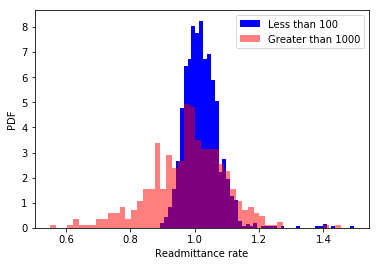

In [17]:
# Perform pairs bootstrap for the linear regression
#bs_slope, bs_intercept = draw_bs_pairs_linreg(x,y,size=1000)

# Compute and print 95% CI for slope
print(np.percentile(y_L100, [.5,99.5]))
print(np.percentile(y_G1000, [.5,99.5]))

# Plot the histogram
_ = plt.hist(y_L100, bins=50, normed=True,color='blue')
_ = plt.hist(y_G1000, bins=50, normed=True,color='red',alpha=.5)
_ = plt.xlabel('Readmittance rate')
_ = plt.ylabel('PDF')
_ = plt.legend(['Less than 100','Greater than 1000'])
plt.show()

****
### Exercise Results

A. Do you agree with the above analysis and recommendations? Why or why not?

   I do agree with the general results of a downward slope as the number of releases from a hospital increases. There is a statistically signifigant difference and the hospitals with a greater number of releases have a lower readmitance rate by 4%. That means that growing hospital size is likely to decrease readmitance a little though the results are likely to be small as the larger hospitals do have greater variance as well as shown by the histogram.